# Consulta Renca 2019 CMM

Francisco Förster, 2020

Este notebook muestra el análisis del experimento realizado en 2020 en la consulta ciudadana de la comuna de Renca, modificando la papeleta y utilizando el método de juicio mayoritario.

Importar librerías

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:79% !important; }</style>"))

In [107]:
from matplotlib import cm
cmap = cm.get_cmap('viridis')
cmap_r = cm.get_cmap('viridis_r')
from matplotlib.colors import Normalize

In [108]:
import os
if not os.path.exists("plots"):
    os.makedirs("plots")

# Leer datos crudos

Traspaso de votos a formato digital

16 Dic

urna 86 (Lo Velásquez): 17:50 (2) - 18:51 (252)

urna 94 (Bulnes): 19:51 (253) - 20:23 (496)

17 Dic

urna 87 (Matte): 18:16 (497) - 18:48 (695) 

urna 34 (Cumbres): 18:57 (696) - 19:25 (996) 

In [109]:
df = pd.read_csv("datos/Renca.csv")
df.head()

,Timestamp,Local,"Considerando la situación actual del país, ¿qué tan importantes son las siguientes demandas sociales? [Acceso y calidad de la educación pública]","Considerando la situación actual del país, ¿qué tan importantes son las siguientes demandas sociales? [Acceso y calidad de la vivienda]","Considerando la situación actual del país, ¿qué tan importantes son las siguientes demandas sociales? [Ampliar el acceso al agua]","Considerando la situación actual del país, ¿qué tan importantes son las siguientes demandas sociales? [Cuidado del medio ambiente y recursos naturales]","Considerando la situación actual del país, ¿qué tan importantes son las siguientes demandas sociales? [Deuda universitaria (CAE y otros)]","Considerando la situación actual del país, ¿qué tan importantes son las siguientes demandas sociales? [Mejorar la calidad de la salud pública y su financiamiento]","Considerando la situación actual del país, ¿qué tan importantes son las siguientes demandas sociales? [Mejorar las pensiones y dignificar la vida de los adultos mayores]","Considerando la situación actual del país, ¿qué tan importantes son las siguientes demandas sociales? [Reducir costos de los servicios básicos (agua, electricidad, etc.)]","Considerando la situación actual del país, ¿qué tan importantes son las siguientes demandas sociales? [Reducir la desigualdad de ingresos]","Considerando la situación actual del país, ¿qué tan importantes son las siguientes demandas sociales? [Reducir la impunidad y la delincuencia]","Considerando la situación actual del país, ¿qué tan importantes son las siguientes demandas sociales? [Transporte público (calidad, acceso y precio)]"
0,16/12/2019 17:50:43,Lo Velásquez,Muy imp.,Muy imp.,Extremadamente imp.,Extremadamente imp.,Extremadamente imp.,Extremadamente imp.,Extremadamente imp.,Muy imp.,Muy imp.,Muy imp.,Imp.
1,16/12/2019 17:51:21,Lo Velásquez,Muy imp.,Extremadamente imp.,Extremadamente imp.,Imp.,Imp.,Muy imp.,Extremadamente imp.,Extremadamente imp.,Muy imp.,Imp.,Muy imp.
2,16/12/2019 17:51:54,Lo Velásquez,Muy imp.,Extremadamente imp.,Muy imp.,Muy imp.,Muy imp.,Muy imp.,Muy imp.,Extremadamente imp.,Extremadamente imp.,Muy imp.,Muy imp.
3,16/12/2019 17:54:05,Lo Velásquez,Muy imp.,Muy imp.,Muy imp.,Imp.,Muy imp.,Muy imp.,Muy imp.,Muy imp.,Muy imp.,Imp.,Muy imp.
4,16/12/2019 17:58:33,Lo Velásquez,Extremadamente imp.,Extremadamente imp.,Extremadamente imp.,Extremadamente imp.,Extremadamente imp.,Extremadamente imp.,Extremadamente imp.,Muy imp.,Extremadamente imp.,Imp.,Muy imp.


Definir nombres cortos de demandas

## Análisis de Demandas sin respuestas o inválidas

Gráfico de % votos con un número dado de demandas sin respuesta o inválidas

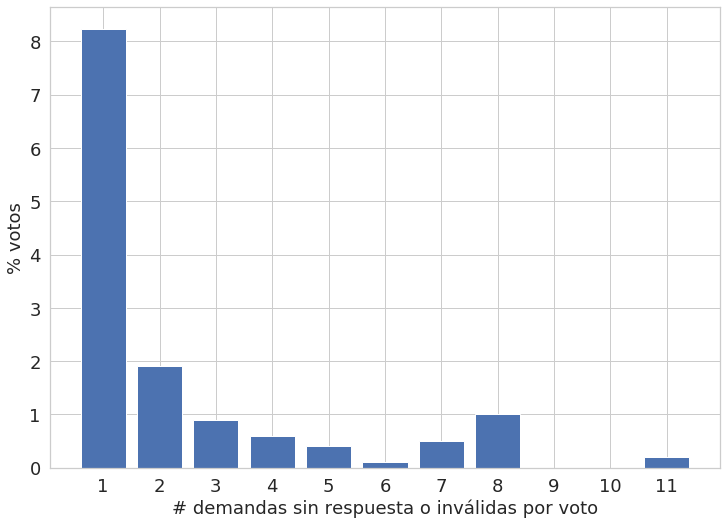

In [110]:
nbad = np.arange(1, 12)
nbad_count = []
for i in nbad:
    nbad_count.append((df.isna().sum(axis=1) == i).sum() / df.shape[0] * 100.)

# graficar
fig, ax = plt.subplots(figsize=(12, 12/np.sqrt(2.)))
ax.bar(nbad, nbad_count)
ax.set_xlabel("# demandas sin respuesta o inválidas por voto", fontsize=18)
ax.set_ylabel("% votos", fontsize=18)
# ticks
ax.set_xticks(np.array(range(11)) + 1)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
plt.savefig("plots/sinrespuesta.png")
plt.savefig("plots/sinrespuesta.pdf")

Votos totales

In [115]:
df.shape[0]

995

Votos sin respuestas en blanco o nulas

In [117]:
df.dropna().shape[0]

857

Votos con respuesta en blanco o con respuestas inválidas

In [105]:
(df.isna().sum(axis=1) > 0).sum()# / df.shape[0] / df.shape[1]

138

Votos con respuesta "No es importante"

In [101]:
((df == "No es imp.").sum(axis=1) > 0).sum()

15

Fracción de votos con más de una demanda sin respuesta o inválida

In [10]:
np.sum(nbad_count[1:]) / np.sum(nbad_count)

0.4057971014492754

Fracción de votos con al menos una demanda sin respuesta o inválida

In [11]:
np.sum(nbad_count)

13.86934673366834

## Limpiar datos

Guardar locales y borrar del dataframe, borrar tiempo de ingreso de voto

In [12]:
locales = df.Local
df.drop("Local", axis=1, inplace=True)
df.drop("Timestamp", axis=1, inplace=True)

Renombrar columnas

In [13]:
for name in list(df):
    if name[:101] == "Considerando la situación actual del país, ¿qué tan importantes son las siguientes demandas sociales?":
        df.rename({name: name[103:-1]}, inplace=True, axis=1)

In [14]:
list(df)

['Acceso y calidad de la educación pública',
 'Acceso y calidad de la vivienda',
 'Ampliar el acceso al agua',
 'Cuidado del medio ambiente y recursos naturales',
 'Deuda universitaria (CAE y otros)',
 'Mejorar la calidad de la salud pública y su financiamiento',
 'Mejorar las pensiones y dignificar la vida de los adultos mayores',
 'Reducir costos de los servicios básicos (agua, electricidad, etc.)',
 'Reducir la desigualdad de ingresos',
 'Reducir la impunidad y la delincuencia',
 'Transporte público (calidad, acceso y precio)']

In [15]:
demandas = ["Educación", "Vivienda", "Agua", "Medio Ambiente", "Deuda Universitaria", "Salud", 
                    "Pensiones", "Servicios Básicos", "Desigualdad Ingresos", "Impunidad y Delincuencia", "Transporte"]

In [16]:
demandas_dict = dict(zip(list(df), demandas))

Llenar valores sin respuesta o inválidos con "No es importante" (sugerido por autores de método de voto mayoritario)

In [17]:
df.fillna("No es imp.", inplace=True)

# alternativa, borrar nans
# df.dropna(inplace=True)

Reemplazar respuestas por valores numéricos (truco para facilitar análisis posterior, no cambia resultado, respuestas cualitativas no pueden ser traducidas a respuestas numéricas)

In [18]:
order = ["No es imp.", "Poco imp.", "Medianamente imp.", "Imp.", "Muy imp.", "Extremadamente imp."]
for idx, val in enumerate(order):
    df.replace(val, idx, inplace=True)

# Analizar datos blancos o nulos

In [19]:
df_null = pd.read_csv("datos/Renca_blancosnulos.csv")

In [118]:
df_null.shape

(49, 11)

In [82]:
((df_null == "Blanco").sum(axis=1) > 0).sum()

34

In [83]:
((df_null == "Nulo").sum(axis=1) > 0).sum()

23

In [20]:
df_null.drop("Timestamp", axis=1, inplace=True)

In [21]:
for name in list(df_null):
    if name[:101] == "Considerando la situación actual del país, ¿qué tan importantes son las siguientes demandas sociales?":
        df_null.rename({name: name[103:-1]}, inplace=True, axis=1)
df_null.head()

,Acceso y calidad de la educación pública,Acceso y calidad de la vivienda,Ampliar el acceso al agua,Cuidado del medio ambiente y recursos naturales,Deuda universitaria (CAE y otros),Mejorar la calidad de la salud pública y su financiamiento,Mejorar las pensiones y dignificar la vida de los adultos mayores,"Reducir costos de los servicios básicos (agua, electricidad, etc.)",Reducir la desigualdad de ingresos,Reducir la impunidad y la delincuencia,"Transporte público (calidad, acceso y precio)"
0,Nulo,Ext imp.,Muy imp.,Ext imp.,Muy imp.,Muy imp.,Muy imp.,Muy imp.,Ext imp.,Muy imp.,Blanco
1,Ext imp.,Blanco,Blanco,Blanco,Ext imp.,Blanco,Ext imp.,Blanco,Blanco,Blanco,Blanco
2,Ext imp.,Ext imp.,Ext imp.,Ext imp.,Blanco,Ext imp.,Ext imp.,Ext imp.,Ext imp.,Ext imp.,Ext imp.
3,Ext imp.,Ext imp.,Blanco,Blanco,Blanco,Ext imp.,Blanco,Imp,Blanco,Blanco,Imp
4,Blanco,Blanco,Blanco,Blanco,Muy imp.,Blanco,Ext imp.,Blanco,Blanco,Blanco,Imp


In [22]:
(df_null == "Blanco").sum()

Acceso y calidad de la educación pública                               7
Acceso y calidad de la vivienda                                       11
Ampliar el acceso al agua                                             12
Cuidado del medio ambiente y recursos naturales                       14
Deuda universitaria (CAE y otros)                                     12
Mejorar la calidad de la salud pública y su financiamiento             5
Mejorar las pensiones y dignificar la vida de los adultos mayores      5
Reducir costos de los servicios básicos (agua, electricidad, etc.)    12
Reducir la desigualdad de ingresos                                    12
Reducir la impunidad y la delincuencia                                 8
Transporte público (calidad, acceso y precio)                         11
dtype: int64

In [23]:
(df_null == "Nulo").sum()

Acceso y calidad de la educación pública                              3
Acceso y calidad de la vivienda                                       3
Ampliar el acceso al agua                                             3
Cuidado del medio ambiente y recursos naturales                       3
Deuda universitaria (CAE y otros)                                     2
Mejorar la calidad de la salud pública y su financiamiento            0
Mejorar las pensiones y dignificar la vida de los adultos mayores     5
Reducir costos de los servicios básicos (agua, electricidad, etc.)    1
Reducir la desigualdad de ingresos                                    2
Reducir la impunidad y la delincuencia                                2
Transporte público (calidad, acceso y precio)                         0
dtype: int64

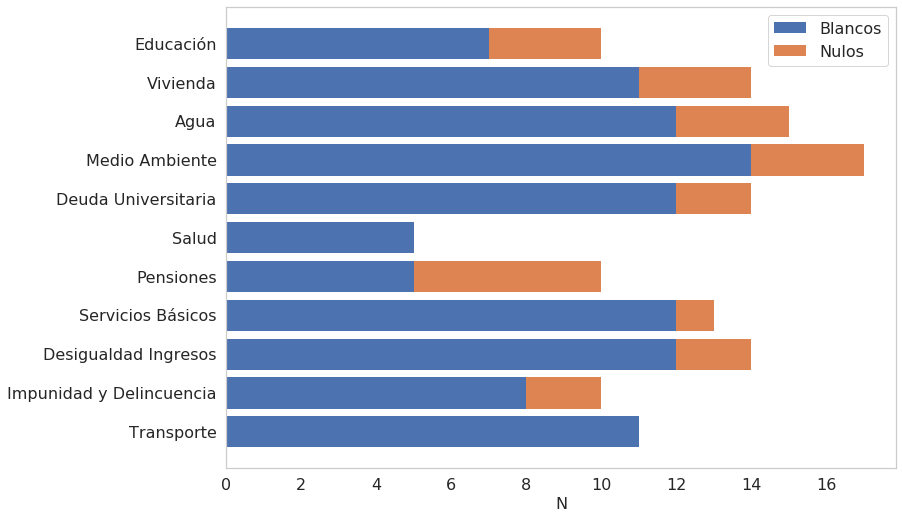

In [24]:
fig, ax = plt.subplots(figsize=(12, 12/np.sqrt(2.)))
ind_blanco = [demandas_dict[ind] for ind in (df_null == "Blanco").sum().index.values][::-1]
height_blanco = (df_null == "Blanco").sum().values[::-1]
ind_nulo = [demandas_dict[ind] for ind in (df_null == "Nulo").sum().index.values][::-1]
height_nulo = (df_null == "Nulo").sum().values[::-1]
ax.barh(y=ind_blanco, width=height_blanco, label="Blancos", lw=0)#, rot=90)
ax.barh(y=ind_nulo, width=height_nulo, left=height_blanco, label="Nulos", lw=0)
ax.grid(False)
ax.set_xlabel("N", fontsize=16)
ax.legend(fontsize=16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
plt.savefig("plots/BlancosNulos.png")
plt.savefig("plots/BlancosNulos.pdf")

# Distribución de votos extremadamente importante

Contar cuántos votos tuvieron sólo respuestas Extremadamente importante

1.105527638190955
4.2211055276381915
11.557788944723619
21.608040201005025
36.381909547738694
50.45226130653266
61.30653266331658
70.85427135678391
77.68844221105527
85.22613065326632
98.69346733668341


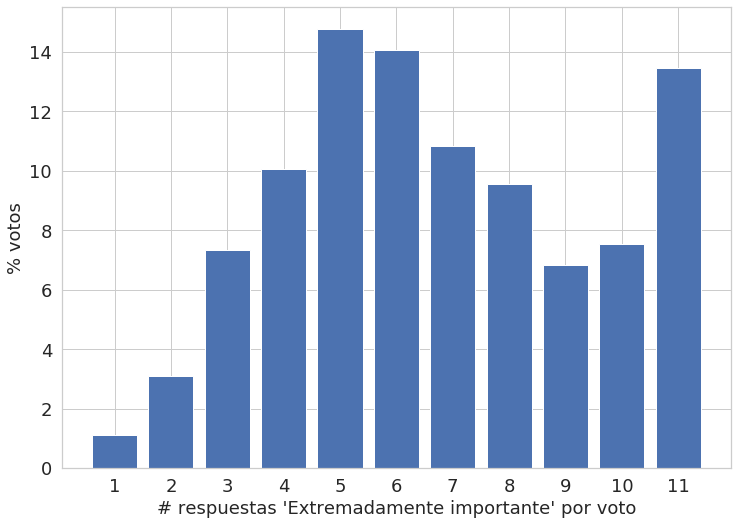

In [25]:
nex = np.arange(1, 12)
nex_count = []
nex_count_cum = [0]
for i in nbad:
    nex_count.append(((df == 5).sum(axis=1) == i).sum() / df.shape[0] * 100.)
    nex_count_cum.append(nex_count_cum[-1] + nex_count[-1])
    print(nex_count_cum[-1])
fig, ax = plt.subplots(figsize=(12, 12/np.sqrt(2.)))
ax.bar(nex, nex_count)
ax.set_xlabel("# respuestas 'Extremadamente importante' por voto", fontsize=18)
ax.set_ylabel("% votos", fontsize=18)
# ticks
ax.set_xticks(np.array(range(11)) + 1)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
plt.savefig("plots/extremos.png")
plt.savefig("plots/extremos.pdf")

# Ordenar demandas usando método de juicio mayoritario

## Función para extraer percentil de interés, ps, qs, agregar sufijos y ordenar

Dado un local, un umbral (50%, 66%), definiremos una función que calcula percentiles, y valores de q y p para percentil anterior:

* p: fracción de valores mayores al del percentil de interés
* q: fracción de valores menores al del percentil de interés

Cuando p > q, se dice que demanda es [percentil]+, cuando p < q, [percentil]-

In [26]:
def sort(dfall, sel_local, threshold, verbose=False):
    
    # seleccionar un local
    if sel_local != "all":
        dfsel = dfall[locales == sel_local]
    else:
        dfsel = dfall
            
    # calcular percentil de interés y valores de q y p
    perc = {}
    perc_vals = {}
    qs = {}
    ps = {}
    suffix = {}
    for name in list(dfsel):
        perc_vals[name] = np.percentile(dfsel[name], 100 - threshold)
        ps[name] = (dfsel[name] > perc_vals[name]).sum() / dfsel.shape[0]
        qs[name] = (dfsel[name] < perc_vals[name]).sum() / dfsel.shape[0]

        if ps[name] > qs[name]:
            suffix[name] = 1
        else:
            suffix[name] = -1
        perc[name] = order[int(perc_vals[name])][:-1] + "ortante"
        
        if verbose:
            print(name)
            print("   p=%.3f, %s, q=%.3f" % (ps[name], perc[name] + ("+" if suffix[name] == 1 else '-'), qs[name]))
            
    # Convertir a numpy array y crear pandas dataframe
    data = np.array([list(perc_vals.values()), list(ps.values()), list(qs.values()), list(suffix.values()), list(perc.values())])
    result = pd.DataFrame(data=data.transpose(), index=list(dfsel), columns=["perc_val", "p", "q", "suffix", "perc"])
    
    # agregar columna con demandas
    result["Demanda"] = demandas
    
    # asegurarse que columnas tengas valores numéricos
    result[["perc_val", "p", "q", "suffix"]] = result[["perc_val", "p", "q", "suffix"]].apply(pd.to_numeric, errors='ignore', axis=1)
    
    # crear columna que se usará para hacer comparación (resultado menor es mejor)
    result["comp"] = result.apply(lambda row: row.q if row.suffix == -1 else -row.p, axis=1)
    
    # ordenar valores:
    # 1. primero según el valor del percentil solicitado en orden descendiente,
    # 2. si valores son iguales, según sufijo en orden descendiente, 
    # 3. si valores son iguales, según valor de comparación en orden ascendente:
    #     si p es mayor que q, mayor p tiene prioridad
    #     si p es menor que q, menor q tiene prioridad
    result = result.sort_values(['perc_val', 'suffix', 'comp'], ascending=[False, False, True])

    return result

## Funciones para visualización

Función para agregar círculos de referencia

In [27]:
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch

class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=1.7 * height + xdescent,
                             height=1.7 * height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

Función para visualizar resultados

In [28]:
def viz(result, dfall, sel_local, threshold):
    
    # seleccionar un local
    if sel_local != "all":
        dfsel = dfall[locales == sel_local]
    else:
        dfsel = dfall
        
    # agregar columnas con porcentaje acumulado desde mayor a menor
    for val in range(6):
        result[str(int(val))] = ((dfsel>=val).sum(axis=0)) / dfsel.shape[0] * 100
        
    # inicializar gráfico
    fig, ax = plt.subplots(figsize=(14, 9))
    sns.set_color_codes("pastel")
    colors = ["gray", "red", "yellow", "greenyellow", "limegreen", "forestgreen"]
    #colors = [cmap(0), cmap(1/5), cmap(2/5), cmap(3/5), cmap(4/5), cmap(1.)]#[::-1]
    
    # barras
    for idx in range(6):
        label = order[idx][:-1] + 'ortante'
        if idx == 0:
            label = order[idx][:-1] + 'ortante, blanco, o nulo'
        sns.barplot(x=str(idx), y="Demanda", data=result,
                label=label, color=colors[idx], linewidth=0)
    
    # círculos
    handles, labels = ax.get_legend_handles_labels()
    for i in range(6):
        handles[i] = mpatches.Circle(handles[i][0].get_xy(), 0.25, facecolor=handles[i][0].get_facecolor(),
                        edgecolor="white", linewidth=1)
        labels[i] = labels[i]
    ax.legend(handles[::-1], labels[::-1], ncol=2, bbox_to_anchor=(1.1, 1.24), frameon=False, fontsize=19, 
             handler_map={mpatches.Circle: HandlerEllipse()})#, handletextpad=0.6)
    
    # ticks
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
        
    # ejes
    ax.axvline(threshold,  c='white')
    if sel_local != "all":
        ax.set_xlabel("%% votos (%s)" % sel_local, fontsize=20)
    else:
        ax.set_xlabel("% votos", fontsize=20)
    ax.set_ylabel("", fontsize=14)
    ax.set_xlim(0, 100)
    ax.grid(False)
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white') 
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    plt.tight_layout(True)
    
    # guardar según local de votación
    if sel_local != "all":
        plt.savefig("plots/demandas_desc_%s_%i.pdf" % (sel_local, th))
        plt.savefig("plots/demandas_desc_%s_%i.png" % (sel_local, th))
    plt.savefig("plots/demandas_desc_%s_%i.pdf" % (sel_local, th))
    plt.savefig("plots/demandas_desc_%s_%i.png" % (sel_local, th))        

## Ejecutar

### Usar todos los locales de votación y la mediana

,perc_val,p,q,suffix,perc,Demanda,comp,0,1,2,3,4,5
Mejorar las pensiones y dignificar la vida de los adultos mayores,5.0,0.000000,0.121608,-1.0,Extremadamente importante,Pensiones,0.121608,100.0,98.190955,98.190955,98.090452,96.984925,87.839196
Mejorar la calidad de la salud pública y su financiamiento,5.0,0.000000,0.140704,-1.0,Extremadamente importante,Salud,0.140704,100.0,97.989950,97.989950,97.889447,96.482412,85.929648
Acceso y calidad de la educación pública,5.0,0.000000,0.210050,-1.0,Extremadamente importante,Educación,0.210050,100.0,98.291457,98.291457,98.291457,94.472362,78.994975
Cuidado del medio ambiente y recursos naturales,5.0,0.000000,0.392965,-1.0,Extremadamente importante,Medio Ambiente,0.392965,100.0,95.276382,95.175879,93.969849,84.120603,60.703518
Reducir la desigualdad de ingresos,5.0,0.000000,0.393970,-1.0,Extremadamente importante,Desigualdad Ingresos,0.393970,100.0,96.080402,95.778894,94.271357,84.723618,60.603015
Reducir la impunidad y la delincuencia,5.0,0.000000,0.425126,-1.0,Extremadamente importante,Impunidad y Delincuencia,0.425126,100.0,97.085427,96.080402,93.266332,82.110553,57.487437
Ampliar el acceso al agua,5.0,0.000000,0.461307,-1.0,Extremadamente importante,Agua,0.461307,100.0,95.778894,95.577889,93.668342,81.005025,53.869347
Deuda universitaria (CAE y otros),5.0,0.000000,0.497487,-1.0,Extremadamente importante,Deuda Universitaria,0.497487,100.0,95.879397,95.778894,92.160804,75.175879,50.251256
Acceso y calidad de la vivienda,4.0,0.459296,0.203015,1.0,Muy importante,Vivienda,-0.459296,100.0,95.979899,95.879397,94.673367,79.698492,45.929648
"Reducir costos de los servicios básicos (agua, electricidad, etc.)",4.0,0.432161,0.237186,1.0,Muy importante,Servicios Básicos,-0.432161,100.0,96.281407,96.080402,93.869347,76.281407,43.216080


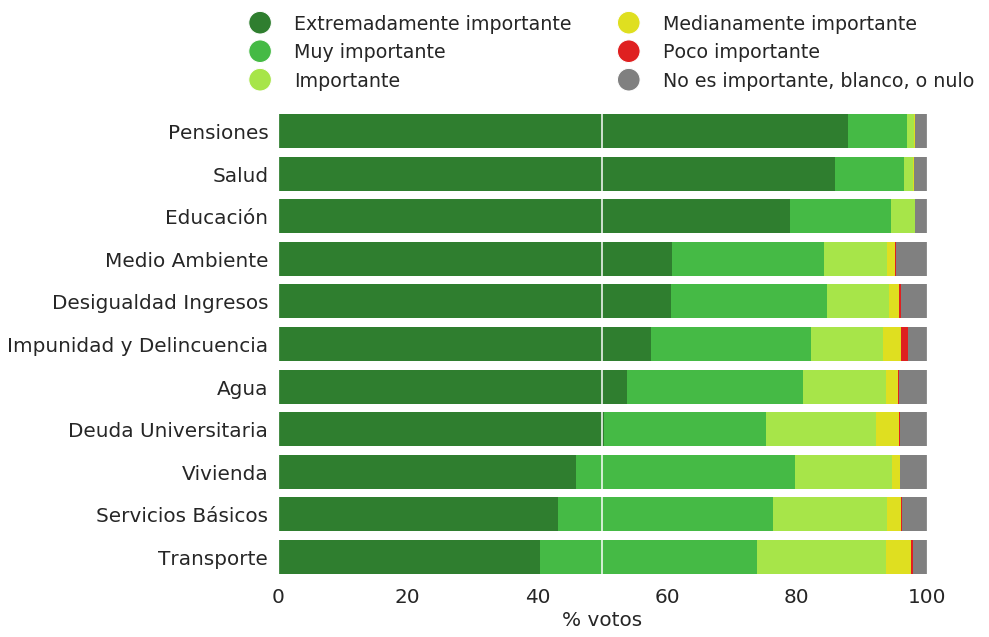

In [29]:
sel_local = "all"
th = 50
result = sort(df, sel_local, th)
viz(result, df, sel_local, th)
result

### Probar un percentil diferente (2/3)

,perc_val,p,q,suffix,perc,Demanda,comp,0,1,2,3,4,5
Mejorar las pensiones y dignificar la vida de los adultos mayores,5.0,0.000000,0.121608,-1.0,Extremadamente importante,Pensiones,0.121608,100.0,98.190955,98.190955,98.090452,96.984925,87.839196
Mejorar la calidad de la salud pública y su financiamiento,5.0,0.000000,0.140704,-1.0,Extremadamente importante,Salud,0.140704,100.0,97.989950,97.989950,97.889447,96.482412,85.929648
Acceso y calidad de la educación pública,5.0,0.000000,0.210050,-1.0,Extremadamente importante,Educación,0.210050,100.0,98.291457,98.291457,98.291457,94.472362,78.994975
Cuidado del medio ambiente y recursos naturales,4.0,0.607035,0.158794,1.0,Muy importante,Medio Ambiente,-0.607035,100.0,95.276382,95.175879,93.969849,84.120603,60.703518
Reducir la desigualdad de ingresos,4.0,0.606030,0.152764,1.0,Muy importante,Desigualdad Ingresos,-0.606030,100.0,96.080402,95.778894,94.271357,84.723618,60.603015
Reducir la impunidad y la delincuencia,4.0,0.574874,0.178894,1.0,Muy importante,Impunidad y Delincuencia,-0.574874,100.0,97.085427,96.080402,93.266332,82.110553,57.487437
Ampliar el acceso al agua,4.0,0.538693,0.189950,1.0,Muy importante,Agua,-0.538693,100.0,95.778894,95.577889,93.668342,81.005025,53.869347
Deuda universitaria (CAE y otros),4.0,0.502513,0.248241,1.0,Muy importante,Deuda Universitaria,-0.502513,100.0,95.879397,95.778894,92.160804,75.175879,50.251256
Acceso y calidad de la vivienda,4.0,0.459296,0.203015,1.0,Muy importante,Vivienda,-0.459296,100.0,95.979899,95.879397,94.673367,79.698492,45.929648
"Reducir costos de los servicios básicos (agua, electricidad, etc.)",4.0,0.432161,0.237186,1.0,Muy importante,Servicios Básicos,-0.432161,100.0,96.281407,96.080402,93.869347,76.281407,43.216080


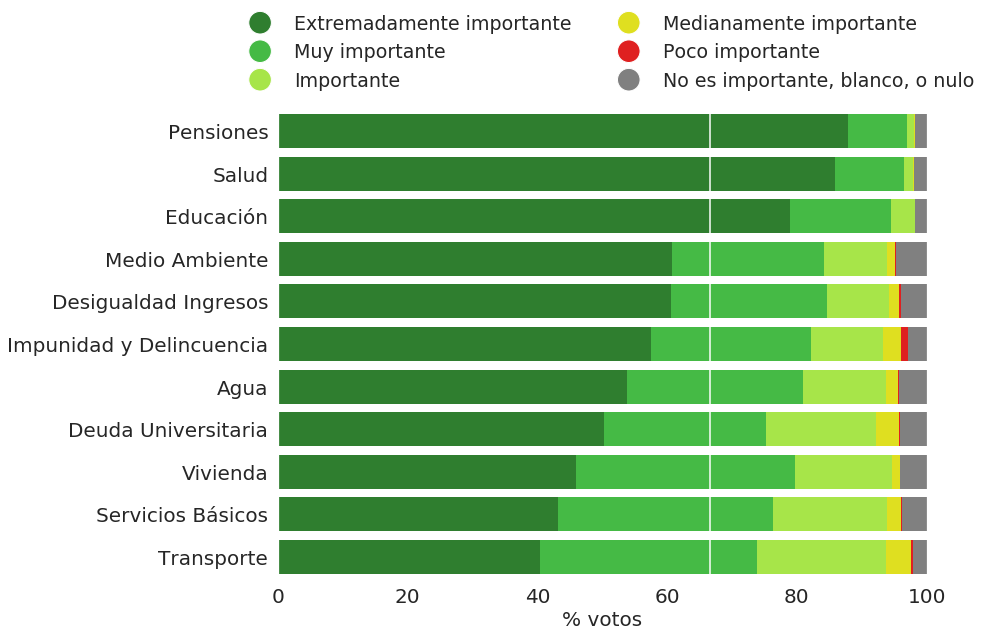

In [30]:
sel_local = "all"
th = 100. * 2./3.
result = sort(df, sel_local, th)
viz(result, df, sel_local, th)
result

### Probar distintos locales de votación

Lo Velásquez
Bulnes
Matte
Cumbres


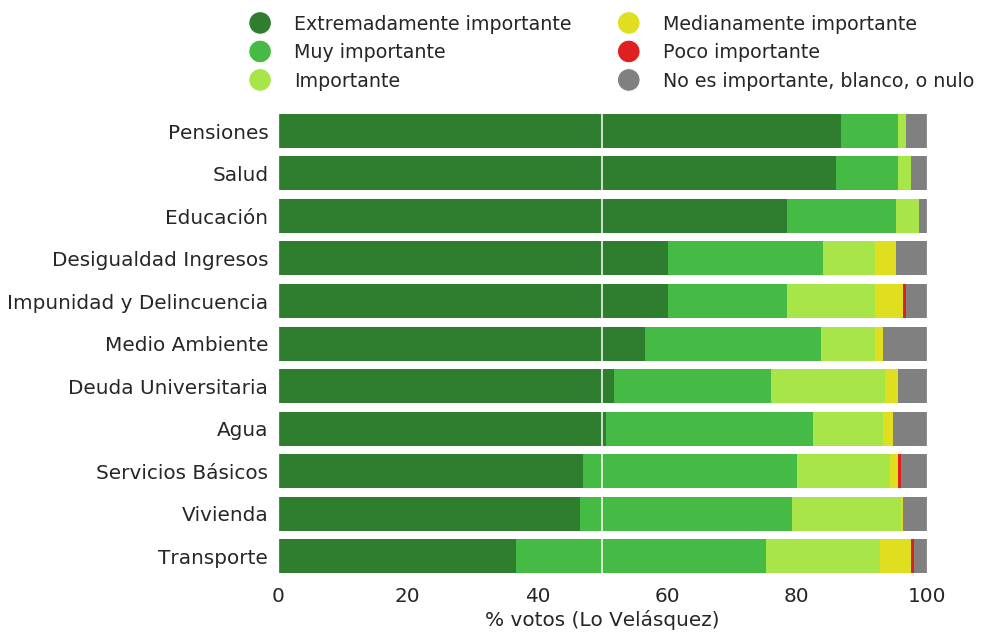

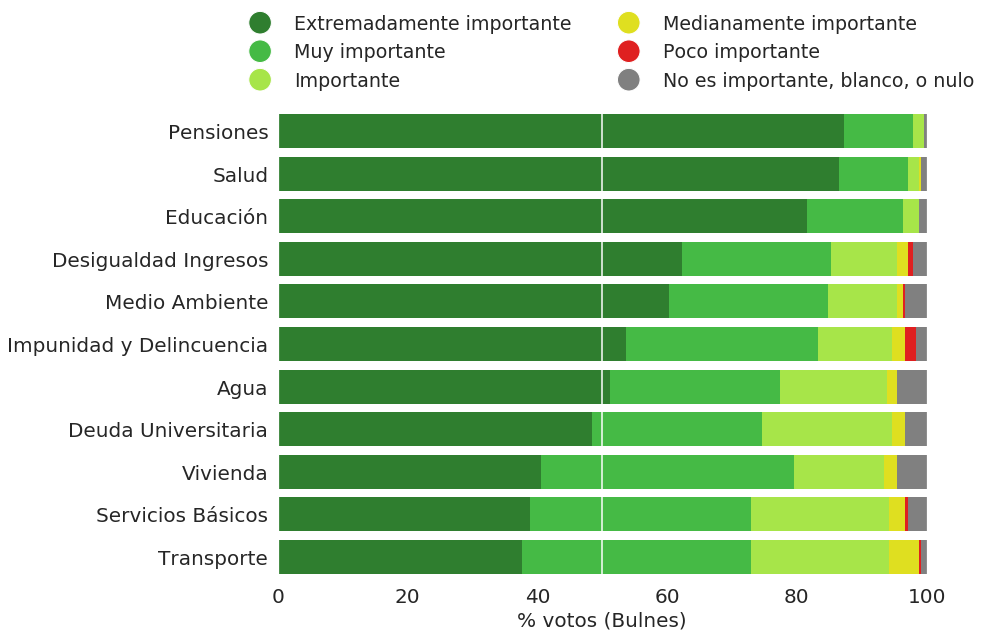

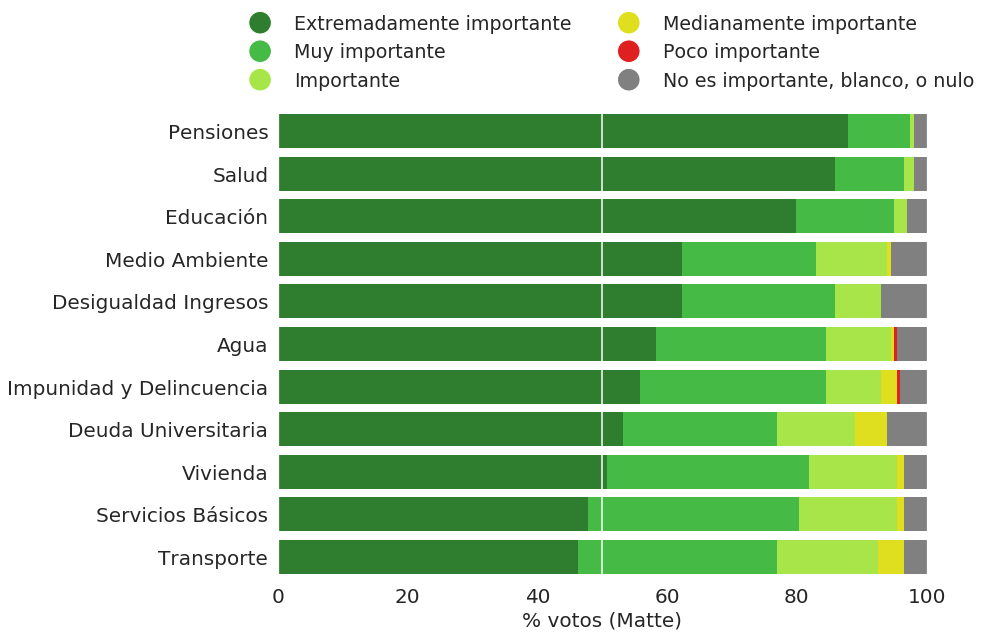

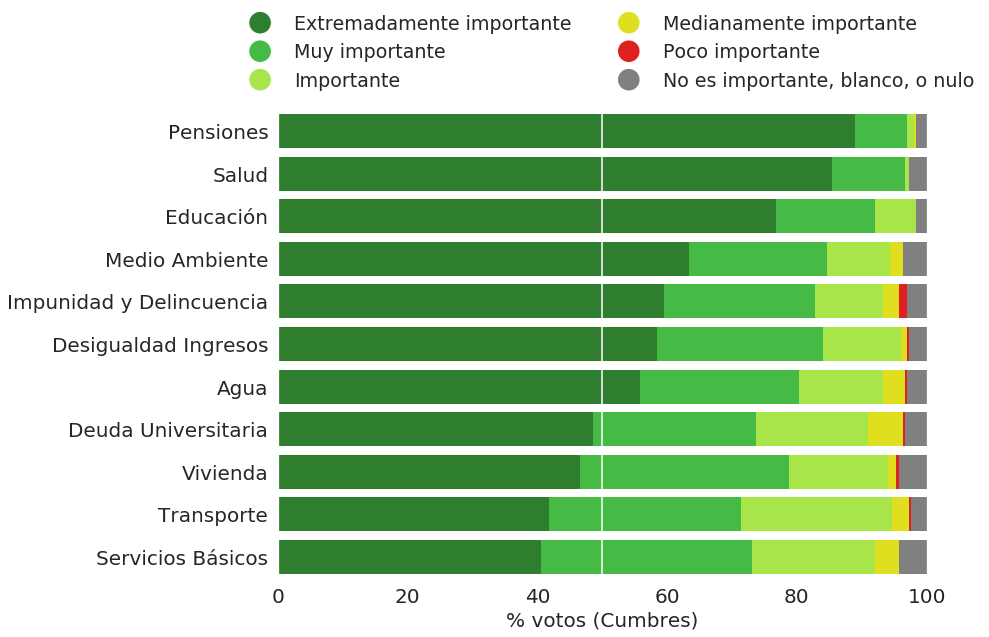

In [31]:
th = 50
for sel_local in locales.unique():
    print(sel_local)
    result = sort(df, sel_local, th)
    viz(result, df, sel_local, th)

# Qué tan robusto es el resultado?

Generaremos 1000 resampleos con repetición y repetiremos ordenamiento

In [32]:
vals = {}
for val in result.index:
    vals[val] = []
nsamp = 1000
for i in range(nsamp):
    result = sort(df.sample(df.shape[0], replace=True), sel_local, th)
    for idx, val in enumerate(result.index):
        vals[val].append(idx + 1)

/home/fforster/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


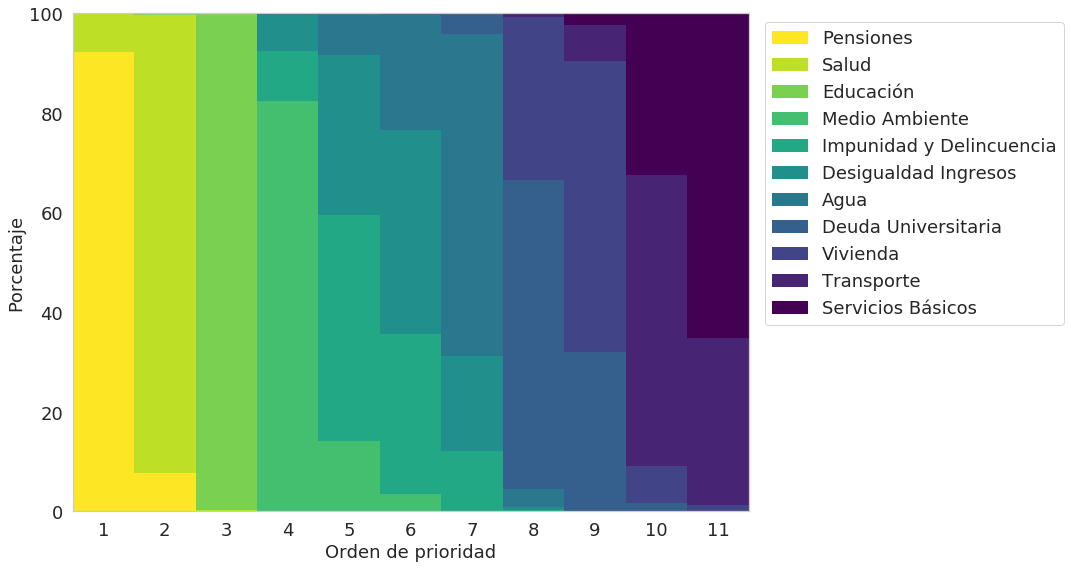

In [33]:
fig, ax = plt.subplots(figsize=(15, 8))
norm = Normalize(vmin=0, vmax=10)
ind = np.arange(1, 12)
sum_height = np.zeros_like(ind)
for idx, val in enumerate(vals.keys()):
    height = np.array([np.sum(vals[val] == i) for i in ind]) / nsamp * 100.
    ax.bar(ind, height, width=1, bottom=sum_height, label=demandas_dict[val], color=cmap_r(norm(idx)), lw=0) #, bins=np.linspace(0.5, 10.5, 11), histtype='step', lw=4, 
    sum_height = sum_height+height
ax.legend(bbox_to_anchor=(1.01, 1), fontsize=18)
ax.set_xlabel("Orden de prioridad", fontsize = 18)
ax.set_ylabel("Porcentaje", fontsize = 18)
ax.set_xlim(0.5, 11.5)
ax.set_xticks(ind)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
plt.tight_layout()
plt.savefig("plots/incertezas.png")
plt.savefig("plots/incertezas.pdf")

# Proyección a espacio de menor dimensión

## Análisis de componentes principales

Ahora realizaremos una reducción de dimensionalidad de los datos.
Primero haremos un análisis de componentes principales, asumiendo evaluaciones pueden traducirse en escala numérica de 0 a 5.
Esta reducción es una de las más simples posibles, una proyección lineal de los datos, pero con una mayor interpretabilidad.

Crear copia de arreglo de votos

In [34]:
df2 = df.copy()

Renombrar demandas

In [35]:
for idx, name in enumerate(list(df2)):
    df2.rename({name: demandas[idx]}, axis=1, inplace=True)

df2.head()
cols = df2.columns

Usar standard scaler, realizar descomposición y transformar votos

In [36]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df2)
df2_scaled = scaler.transform(df2)
df2_scaled = pd.DataFrame(df2_scaled, index=df.index, columns=df2.columns)
#df2_scaled = df2.copy()

pca = decomposition.PCA()
pca.fit(df2_scaled)
df_pca = pca.transform(df2_scaled)

Mostrar varianza explicada por cada componente principal

In [37]:
pca.explained_variance_ratio_

array([0.36987437, 0.08817985, 0.08485211, 0.07396048, 0.06787631,
       0.06661174, 0.06095008, 0.05568291, 0.05091617, 0.04251598,
       0.03857999])

In [38]:
df2_scaled.head()

,Educación,Vivienda,Agua,Medio Ambiente,Deuda Universitaria,Salud,Pensiones,Servicios Básicos,Desigualdad Ingresos,Impunidad y Delincuencia,Transporte
0,-0.858001,-0.106873,0.678045,0.591041,0.746779,0.301931,0.278126,-0.050123,-0.274099,-0.229359,-0.976132
1,-0.858001,0.771958,0.678045,-1.079657,-0.898947,-0.971041,0.278126,0.824829,-0.274099,-1.110485,-0.032253
2,-0.858001,0.771958,-0.168448,-0.244308,-0.076084,-0.971041,-1.065250,0.824829,0.597239,-0.229359,-0.032253
3,-0.858001,-0.106873,-0.168448,-1.079657,-0.076084,-0.971041,-1.065250,-0.050123,-0.274099,-1.110485,-0.032253
4,0.397456,0.771958,0.678045,0.591041,0.746779,0.301931,0.278126,-0.050123,0.597239,-1.110485,-0.032253


In [39]:
np.concatenate([[0], pca.explained_variance_ratio_.cumsum()])

array([0.        , 0.36987437, 0.45805422, 0.54290633, 0.61686682,
       0.68474313, 0.75135487, 0.81230494, 0.86798786, 0.91890403,
       0.96142001, 1.        ])

Mostrar varianza explicada en función de número de componentes

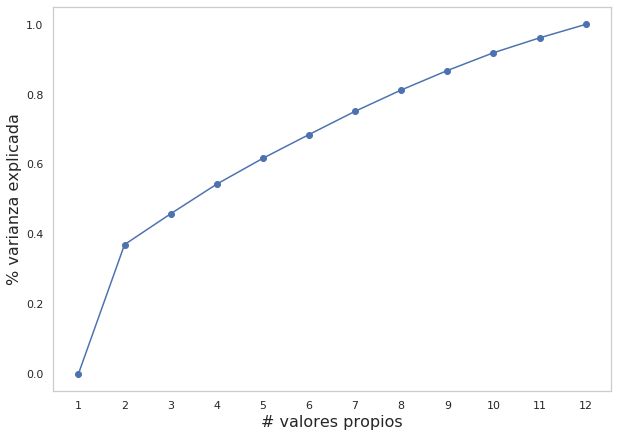

In [40]:
fig, ax = plt.subplots(figsize=(10, 10/np.sqrt(2)))
ax.plot(np.array(range(12)) + 1, np.concatenate([[0], pca.explained_variance_ratio_.cumsum()]), marker='o')
ax.set_xlabel("# valores propios", fontsize=16)
ax.set_ylabel("% varianza explicada", fontsize=16)
ax.set_xticks(np.array(range(12)) + 1)
ax.grid(False)
plt.savefig("plots/PCA_varianza.png")
plt.savefig("plots/PCA_varianza.pdf")

Mostrar loading vectors: proyección de cada dimensión en dos vectores propios principales

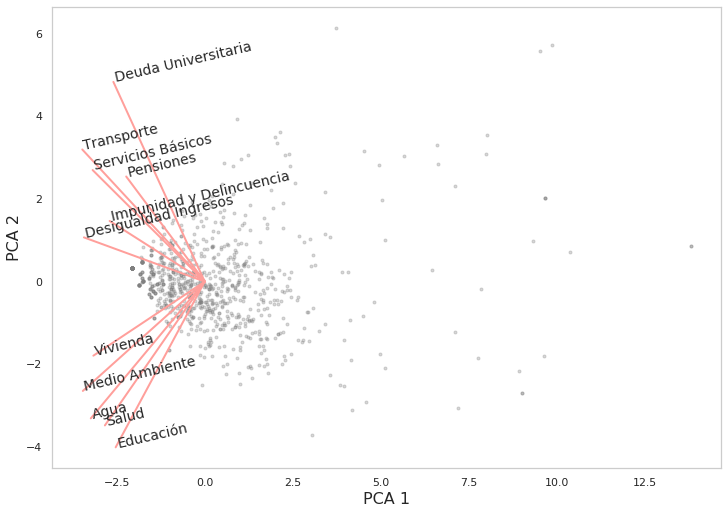

In [41]:
# projected coordinates
fig, ax = plt.subplots(figsize = (12, 12/np.sqrt(2)))
ax.scatter(df_pca[:, 0], df_pca[:, 1], c = 'gray', marker='.', alpha = 0.3)

# loading vectors
ev = 10. * pca.components_
for idx, var in enumerate(list(df2)):
    ax.plot([0, ev[0, idx]], [0, ev[1, idx]], lw=2, c = 'r')
    ax.text(ev[0, idx], ev[1, idx], var, fontsize=14, rotation=13)
        
ax.set_xlabel("PCA 1", fontsize=16)
ax.set_ylabel("PCA 2", fontsize=16)
ax.grid(False)
plt.savefig("plots/PCA.png")
plt.savefig("plots/PCA.pdf")

Gráfico muestra que deuda universitaria es la demanda que explica la mayor parte de la varianza en los datos.
En una dirección relativamente ortogonal se puede observar que agua, medio ambiente, vivienda, impunidad y delincuencia parecen estar relativamente alineadas. Estas variables están principalmente asociadas con el contexto físico.
Luego se puede ver que transporte, servicios básicos, desigualdad de ingresos relativamente alineados. Estas dimensiones están asociadas con una dimensión socio-económica.
Finalmente, salud, educación y pensiones no contribuyen mayormemente a la varianza explicada por las primeras componentes principales.
Cuando se considera tercera componente principal se observa que impunidad y delincuencia se separa de variables relacionadas con espacio físico.

## tSNE

Ahora consideraremos otra forma de reducir dimensiones de los datos, usando proyección t-SNE

In [42]:
from sklearn.manifold import TSNE

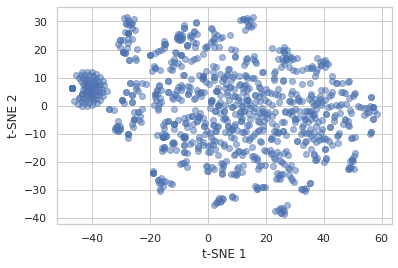

In [43]:
tsne_model = TSNE(n_components = 2, init = 'pca', perplexity = 25, random_state=1)
df_tsne = tsne_model.fit_transform(df2_scaled)

fig, ax = plt.subplots()
ax.scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=0.5)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
plt.savefig("plots/tsne.png")
plt.savefig("plots/tsne.pdf")

## UMAP

Ahora estudiaremos proyección UMAP, otra forma de proyectar datos de muchas dimensiones en un espacio de menos dimensiones.

In [44]:
import umap
reducer = umap.UMAP(random_state=10, n_neighbors=10, min_dist=0.2)

In [45]:
df_umap = reducer.fit_transform(df2_scaled)
df_umap.shape

(995, 2)

In [46]:
locales.unique()

array(['Lo Velásquez', 'Bulnes', 'Matte', 'Cumbres'], dtype=object)

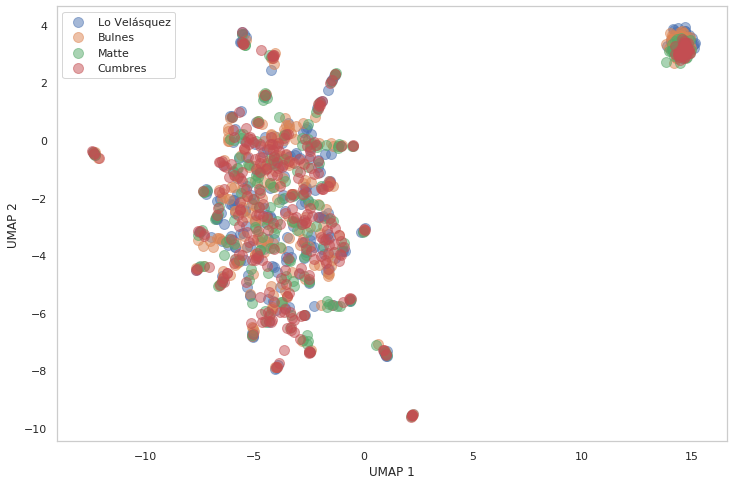

In [47]:
fig, ax = plt.subplots(figsize = (12, 8))
for local in locales.unique():
    mask = (locales == local)
    ax.scatter(df_umap[mask][:, 0], df_umap[mask][:, 1], alpha = 0.5, label = local, s=100)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.legend()
ax.grid(False)
plt.savefig("plots/umap.png")
plt.savefig("plots/umap.pdf")

# Son las distribuciones de votos consistentes entre locales de votación?

Prueba si distribuciones PCA o UMAP son consistentes

In [48]:
df_test = pd.concat([pd.DataFrame(data=df_umap, columns=["UMAP1", "UMAP2"]), 
                     pd.DataFrame(data=df_pca, columns=["PCA%i" % (i+1) for i in range(11)])], axis=1)
df_test["Local"] = locales
df_test = pd.concat([df, df_test], axis=1)

Testear cada dimensión en proyección PCA

In [49]:
from scipy import stats

ntests = 0
visited = set()
for l1  in df_test.Local.unique():
    visited.add(l1)
    for l2 in df_test.Local.unique():
        if l2 in visited:
            continue
        for var in ["PCA%i" % (i+1) for i in range(11)]:
            pvalue = stats.ks_2samp(df_test.loc[df_test.Local == l1][var], df_test.loc[df_test.Local == l2][var]).pvalue
            ntests += 1
            if pvalue < 0.05:
                print(l1, l2, var, pvalue)
print("#tests: %i" % ntests)

Matte Cumbres PCA7 0.04838852795034643
#tests: 66


Dado que sólo se encontró una diferencia significative entre 66 tests, no es significativa (se esperan ~3 casos debido a fluctuaciones estadísticas)

Testear diferencias en coordenadas de UMAP

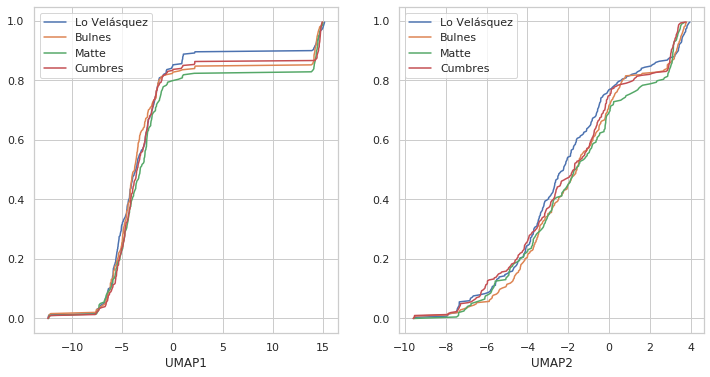

In [50]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
for local in df_test.Local.unique():
    mask = df_test.Local == local
    ax[0].plot(np.sort(df_test.loc[mask].UMAP1), range(df_test.loc[mask].shape[0]) / mask.sum(), label=local)
    ax[1].plot(np.sort(df_test.loc[mask].UMAP2), range(df_test.loc[mask].shape[0]) / mask.sum(), label=local)
ax[0].set_xlabel("UMAP1")
ax[0].legend()
ax[1].set_xlabel("UMAP2")
ax[1].legend()
plt.savefig("plots/UMAP_KS.png")
plt.savefig("plots/UMAP_KS.pdf")

In [51]:
from scipy import stats

ntests = 0
visited = set()
for l1  in df_test.Local.unique():
    visited.add(l1)
    for l2 in df_test.Local.unique():
        if l2 in visited:
            continue
        for var in ["UMAP1", "UMAP2"]:
            pvalue = stats.ks_2samp(df_test.loc[df_test.Local == l1][var], df_test.loc[df_test.Local == l2][var]).pvalue
            ntests += 1
            if pvalue < 0.05:
                print(l1, l2, var, pvalue)
print("#tests: %i" % ntests)

Bulnes Matte UMAP1 0.040373730372421535
#tests: 12


Dado que se encontró una diferencia entre 12 tests, esta no parece muy importante (se esperan 0.6 diferencias significativas debido a fluctuaciones estadísticas)

Testear cada dimensión

In [52]:
from scipy import stats

ntests = 0
visited = set()
for l1  in df_test.Local.unique():
    visited.add(l1)
    for l2 in df_test.Local.unique():
        if l2 in visited:
            continue
        for var in list(df_test.drop(["UMAP1", "UMAP2", "Local"] + ["PCA%i" % (i+1) for i in range(11)], axis=1)):
            z1 = df_test.loc[df_test.Local == l1][var].values.flatten()
            z2 = df_test.loc[df_test.Local == l2][var].values.flatten()
            pvalue = stats.ks_2samp(z1, z2).pvalue
            ntests += 1
            if pvalue < 0.05:
                print(l1, l2, var, pvalue)
print("#tests: %i" % ntests)

#tests: 66


No se encontró ninguna diferencia significative entre 66 tests!

Exportar votos por local de votación

In [53]:
for local in df_test.Local.unique():
    mask = df_test.Local == local
    print(local, mask.sum())
    df_test.loc[mask].drop(["UMAP1", "UMAP2", "Local"] + ["PCA%i" % (i+1) for i in range(11)], axis=1).to_csv("datos/votos_%s.txt" % local.replace(" ", "").replace("á", "a"), sep=" ", index=False, header=False)

Lo Velásquez 251
Bulnes 244
Matte 199
Cumbres 301


# Visualización interactiva

Ahora mostraremos cómo visualizar los datos de forma más interactiva, se mostrarán los datos proyectados usando UMAP, y cada voto de forma interactiva.

In [54]:
#Bokeh
import bokeh.plotting as bpl
import bokeh.models as bmo
from bokeh.palettes import d3
from bokeh.models import HoverTool, CustomJS
from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application
from bokeh.layouts import column, row, WidgetBox
from bokeh.io import push_notebook

bpl.output_notebook()

Loading BokehJS ...

In [55]:
df_bokeh = pd.DataFrame(data=df_umap, columns=["UMAP1", "UMAP2"])
df_bokeh["Local"] = locales
df_bokeh = pd.concat([df, df_bokeh], axis=1)
for idx, demanda in enumerate(list(df_bokeh)):
    if idx < 11:
        print(demanda, demandas[idx])
        if demandas[idx] == "Educación":
            df_bokeh.rename({demanda: "Educacion"}, axis=1, inplace=True)
        if demandas[idx] == "Servicios Básicos":
            df_bokeh.rename({demanda: "ServiciosBasicos"}, axis=1, inplace=True)
        else:
            df_bokeh.rename({demanda: demandas[idx].replace(" ", "")}, axis=1, inplace=True)
df_bokeh.head()

Acceso y calidad de la educación pública Educación
Acceso y calidad de la vivienda Vivienda
Ampliar el acceso al agua Agua
Cuidado del medio ambiente y recursos naturales Medio Ambiente
Deuda universitaria (CAE y otros) Deuda Universitaria
Mejorar la calidad de la salud pública y su financiamiento Salud
Mejorar las pensiones y dignificar la vida de los adultos mayores Pensiones
Reducir costos de los servicios básicos (agua, electricidad, etc.) Servicios Básicos
Reducir la desigualdad de ingresos Desigualdad Ingresos
Reducir la impunidad y la delincuencia Impunidad y Delincuencia
Transporte público (calidad, acceso y precio) Transporte


,Educacion,Vivienda,Agua,MedioAmbiente,DeudaUniversitaria,Salud,Pensiones,ServiciosBasicos,DesigualdadIngresos,ImpunidadyDelincuencia,Transporte,UMAP1,UMAP2,Local
0,4,4,5,5,5,5,5,4,4,4,3,-2.719077,-3.517699,Lo Velásquez
1,4,5,5,3,3,4,5,5,4,3,4,-3.164384,-1.894869,Lo Velásquez
2,4,5,4,4,4,4,4,5,5,4,4,-2.694327,-2.143530,Lo Velásquez
3,4,4,4,3,4,4,4,4,4,3,4,-2.682544,-1.759336,Lo Velásquez
4,5,5,5,5,5,5,5,4,5,3,4,-6.688491,-2.118382,Lo Velásquez


Nube de puntos

In [56]:
scatter_figure = bpl.figure(
    plot_height=600, plot_width=600,
    title='Majority Judgment')

palette = d3['Category10'][4]
color_map = bmo.CategoricalColorMapper(factors=df_bokeh['Local'].unique(), palette=palette)

scatter = scatter_figure.circle(
    x='UMAP1', y='UMAP2', legend='Local', color={'field': 'Local', 'transform': color_map},
    source=df_bokeh,
    alpha=0.8,
    size=5
)
scatter_figure.xgrid.grid_line_color = None
scatter_figure.ygrid.grid_line_color = None

tooltips = [
    ('Local', '@Local'),
    ('UMAP1', '@UMAP1'),
    ('UMAP2', '@UMAP2'),
    ('Educación', '@Educacion'),
    ("Vivienda", '@Vivienda'),
    ("Agua", '@Agua'),
    ("Medio Ambiente", '@MedioAmbiente'),
    ("Deuda Universitaria", '@DeudaUniversitaria'),
    ("Salud", '@Salud'),
    ("Pensiones", '@Pensiones'),
    ("Servicios Básicos", '@ServiciosBasicos'),
    ('Desigualdad Ingresos', '@DesigualdadIngresos'),
    ('Impunidad y Delincuencia', '@ImpunidadyDelincuencia'),
    ('Transporte', '@Transporte'),
    ('index', '$index')
   ]

scatter_figure.legend.location = "bottom_left"
scatter_figure.add_tools(HoverTool(tooltips=tooltips))

Votos individuales

In [57]:
datum = bpl.ColumnDataSource(
    data={
        'demands': np.array(range(11)), 
        'votes': np.zeros(11),
    })

datum_figure = bpl.figure(plot_height=600, plot_width=600, title='Voto', y_range=(-.2, 5.2))
datum_figure.xaxis.ticker = list(range(11))
datum_figure.xaxis.major_label_overrides = {0: 'Educacion',
                                 1: 'Vivienda',
                                 2: 'Agua',
                                 3: 'MedioAmbiente',
                                 4: 'DeudaUniversitaria',
                                 5: 'Salud',
                                 6: 'Pensiones',
                                 7: 'ServiciosBasicos',
                                 8: 'DesigualdadIngresos',
                                 9: 'ImpunidadyDelincuencia',
                                10: 'Transporte'}
datum_figure.xaxis.major_label_orientation = "vertical"
datum_figure.yaxis.major_label_overrides = {0: 'No es imp.',
                                 1: 'Poco imp.',
                                 2: 'Medianamente imp.',
                                 3: 'Imp.',
                                 4: 'Muy imp.',
                                 5: 'Extremadamente imp'}

datum_figure.xaxis.axis_label_text_font_size = '20pt'
datum_figure.yaxis.axis_label_text_font_size = '20pt'

datum_figure.line(source=datum, x='demands', y='votes')
datum_figure.circle(source=datum, x='demands', y='votes', size=20)

# scatter = scatter_figure.circle(...
# datum = bpl.ColumnDataSource(...

GlyphRenderer(id='1102', ...)

Conexión entre figuras y visualización interactiva

In [58]:
def update_bokeh(Educacion, Vivienda, Agua, MedioAmbiente, DeudaUniversitaria, Salud, Pensiones, ServiciosBasicos, DesigualdadIngresos, ImpunidadyDelincuencia, Transporte):
    datum.data['votes'] = np.array([Educacion, Vivienda, Agua, MedioAmbiente, DeudaUniversitaria, Salud, Pensiones, ServiciosBasicos, DesigualdadIngresos, ImpunidadyDelincuencia, Transporte])
    push_notebook(handle=t)
    return

callback = CustomJS(args={'segment': scatter.data_source,
                          'Educacion': df_bokeh.Educacion,
                          'Vivienda': df_bokeh.Vivienda,
                          'Agua': df_bokeh.Agua,
                          'MedioAmbiente': df_bokeh.MedioAmbiente,
                          'DeudaUniversitaria': df_bokeh.DeudaUniversitaria,
                          'Salud': df_bokeh.Salud,
                          'Pensiones': df_bokeh.Pensiones, 
                          'ServiciosBasicos': df_bokeh.ServiciosBasicos,
                          'DesigualdadIngresos': df_bokeh.DesigualdadIngresos,
                          'ImpunidadyDelincuencia': df_bokeh.ImpunidadyDelincuencia,
                          'Transporte': df_bokeh.Transporte,
                           'title': datum_figure.title}, code="""
if (IPython.notebook.kernel !== undefined && cb_data.index['1d'].indices.length !== 0) {
    var kernel = IPython.notebook.kernel;
    idx = cb_data.index['1d'].indices[0];
    cmd = "update_bokeh(" + Educacion[idx] + "," + Vivienda[idx]+ "," + Agua[idx]+ "," 
        + MedioAmbiente[idx] + "," + DeudaUniversitaria[idx] + "," + Salud[idx] + ","
        + Pensiones[idx] + "," + ServiciosBasicos[idx] + "," + DesigualdadIngresos[idx] + ","
        + ImpunidadyDelincuencia[idx] + "," + Transporte[idx] + ")";
    kernel.execute(cmd, {}, {})};
""")

scatter_figure.hover.callback = callback
t = bpl.show(row(scatter_figure, datum_figure), notebook_handle=True)



# Renca oficial

Ahora comparamos los resultados anteriores con los resultados oficiales de Renca

In [59]:
df_oficial = pd.read_csv("datos/Renca_oficial.csv").transpose() * 100.

In [60]:
df_oficial.rename({0: "menciones"}, inplace=True, axis=1)
df_oficial.rename({"Delincuencia": "Impunidad y Delincuencia"}, inplace=True, axis=0)

In [61]:
df_oficial.sort_values(by="menciones", ascending=True, inplace=True)

In [62]:
df_oficial.drop(["Blancos", "Nulos"], inplace=True)

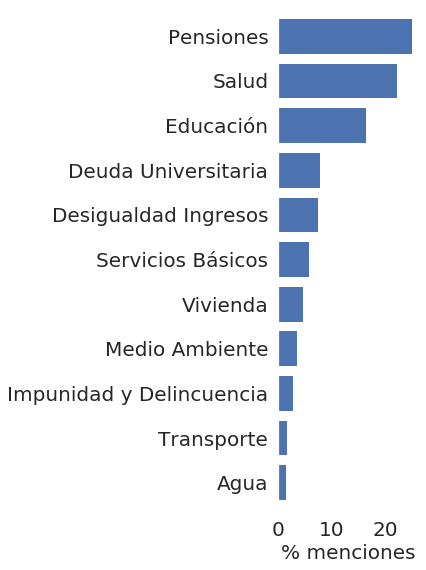

In [63]:
fig, ax = plt.subplots(figsize=(6, 8))
df_oficial.plot.barh(ax=ax, width=0.8)
ax.get_legend().remove()
ax.set_xlabel("% menciones")
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
ax.set_xlabel("% menciones", fontsize=20)
ax.set_ylabel("", fontsize=14)
ax.grid(False)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
plt.tight_layout(True)
plt.savefig("plots/Renca_oficial.png")
plt.savefig("plots/Renca_oficial.pdf")

## Cambios con respecto a voto oficial

Ahora mostramos los cambios con respecto a la votación oficial de Renca

In [64]:
comp = pd.DataFrame()
comp["Consulta Renca"] = df_oficial.index.values[::-1]
comp["MJ"] = result.Demanda.values
comp["Cambio"] = comp.apply(lambda row: row.name - comp[comp["MJ"] == row["Consulta Renca"]].index.tolist()[0], axis=1)
comp["Cambio"] = comp.apply(lambda row: row.Cambio if row.Cambio < 0 else ("=" if row.Cambio == 0 else "+%i" % row.Cambio), axis=1)
display(comp)
comp.set_index("Consulta Renca", inplace=True)
comp.drop(["MJ"], axis=1, inplace=True)
comp.rename({"Cambio": "Variación posición"}, axis=1, inplace=True)

,Consulta Renca,MJ,Cambio
0,Pensiones,Pensiones,=
1,Salud,Salud,=
2,Educación,Educación,=
3,Deuda Universitaria,Medio Ambiente,-4
4,Desigualdad Ingresos,Impunidad y Delincuencia,-1
5,Servicios Básicos,Desigualdad Ingresos,-5
6,Vivienda,Agua,-2
7,Medio Ambiente,Deuda Universitaria,+4
8,Impunidad y Delincuencia,Vivienda,+4
9,Transporte,Transporte,=


In [65]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'gray' if val == "=" else ("red" if int(val) < 0  else 'green')
    return 'color: %s' % color

In [66]:
html = (comp.style.applymap(color_negative_red)
        .set_table_styles([{'selector': 'th', 'props': [('font-size', '16pt')]}])
        .set_properties(**{'font-size': '24pt'}).render())

In [67]:
HTML(html)

,Variación posición
Consulta Renca,
Pensiones,=
Salud,=
Educación,=
Deuda Universitaria,-4
Desigualdad Ingresos,-1
Servicios Básicos,-5
Vivienda,-2
Medio Ambiente,+4
Impunidad y Delincuencia,+4


In [68]:
comp.style.applymap(color_negative_red)

,Variación posición
Consulta Renca,
Pensiones,=
Salud,=
Educación,=
Deuda Universitaria,-4
Desigualdad Ingresos,-1
Servicios Básicos,-5
Vivienda,-2
Medio Ambiente,+4
Impunidad y Delincuencia,+4


# Encuesta de salida

In [69]:
df_out = pd.read_csv("datos/Renca_salida.csv")

In [70]:
df_out.head()

,Marca temporal,¿Qué tan claro lo encontró?,Qué tan complicado lo encontró?,¿Qué nota le pondría a la nueva forma de votar?,¿Dentro de qué rango está su edad?,Observado por encuestador/a: Sexo de persona encuestada,Unnamed: 6
0,15/12/2019 10:15:16,Muy claro,Nada complicado,7,Entre 51 y 60,Mujer,"0,591959799"
1,15/12/2019 10:18:12,Muy claro,Nada complicado,7,Entre 51 y 60,Hombre,NaN
2,15/12/2019 10:18:48,Muy claro,Nada complicado,7,Entre 61 y 70,Mujer,NaN
3,15/12/2019 10:19:05,Muy claro,Nada complicado,7,Entre 15 y 20 años,Hombre,NaN
4,15/12/2019 10:20:38,Muy claro,Nada complicado,6,Entre 51 y 60,Hombre,NaN


In [71]:
df_out.replace({"71 o más": "Más de 70"}, inplace=True)

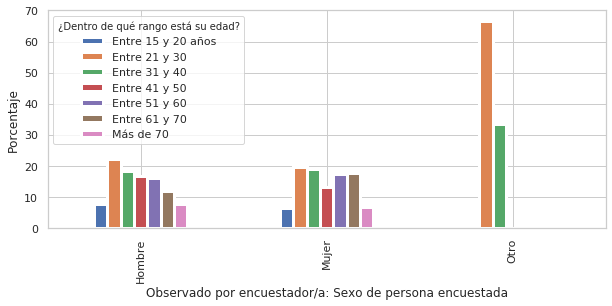

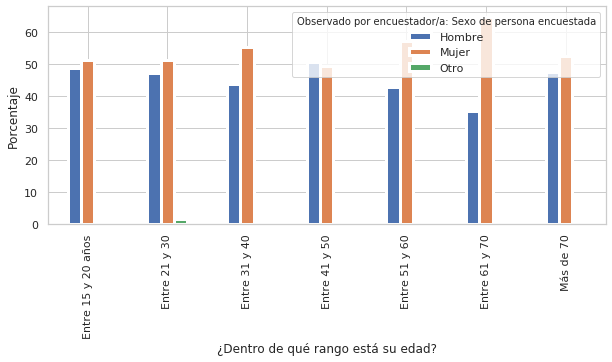

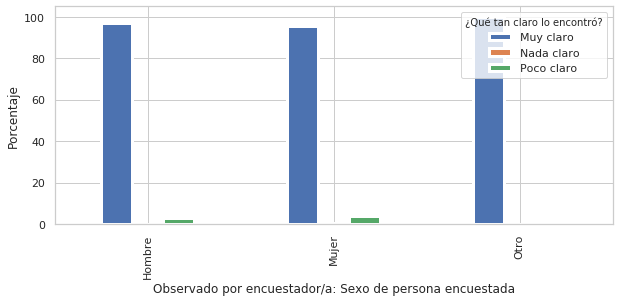

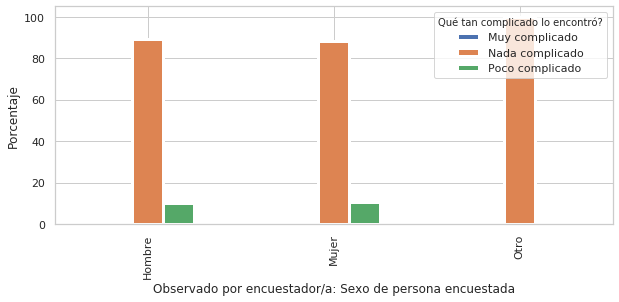

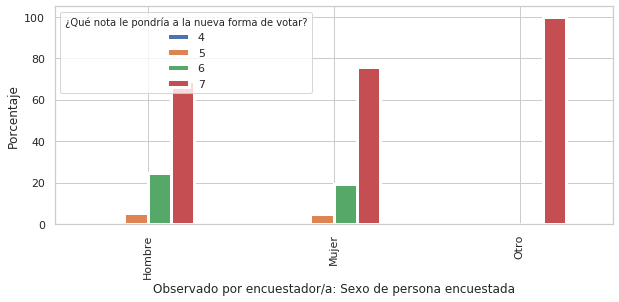

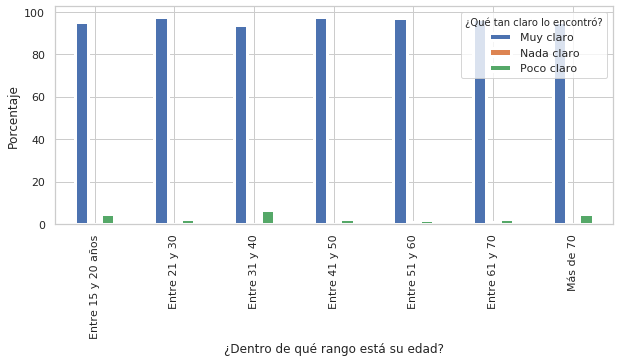

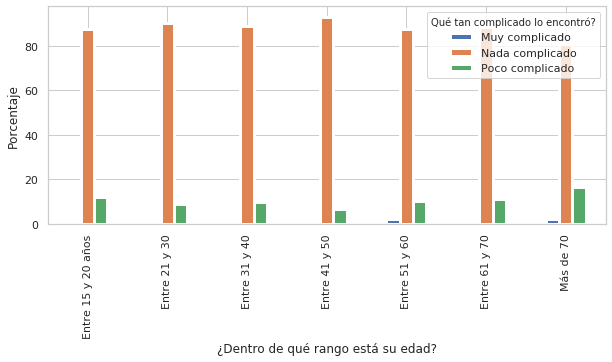

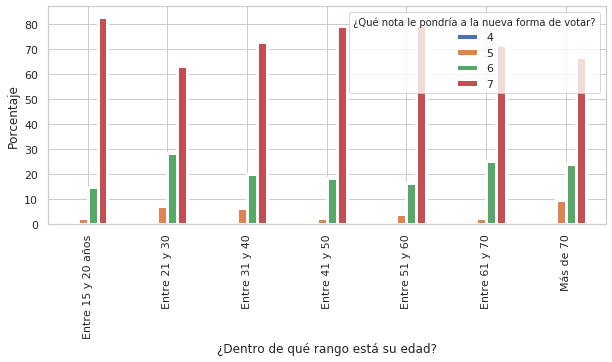

In [72]:
def plot(Q1, Q2, name):
    fig, ax = plt.subplots(figsize=(10, 4))
    (df_out.groupby([Q1, Q2]).count()['Marca temporal'].unstack().div(df_out.groupby([Q1]).count()[Q2].values, axis=0) * 100.).plot.bar(ax=ax, lw=3)
    ax.set_ylabel("Porcentaje")
    plt.savefig("plots/%s.png" % name)
    plt.savefig("plots/%s.pdf" % name)
    

plot('Observado por encuestador/a: Sexo de persona encuestada', '¿Dentro de qué rango está su edad?', "Edad_sexo")
plot('¿Dentro de qué rango está su edad?', 'Observado por encuestador/a: Sexo de persona encuestada', "Edad_sexo")

plot('Observado por encuestador/a: Sexo de persona encuestada', '¿Qué tan claro lo encontró?', "Claridad_sexo")
plot('Observado por encuestador/a: Sexo de persona encuestada', 'Qué tan complicado lo encontró?', "Complicación_sexo")
plot('Observado por encuestador/a: Sexo de persona encuestada', '¿Qué nota le pondría a la nueva forma de votar?', "Nota_sexo")

plot('¿Dentro de qué rango está su edad?', '¿Qué tan claro lo encontró?', "Claridad_edad")
plot('¿Dentro de qué rango está su edad?', 'Qué tan complicado lo encontró?', "Complicación_edad")
plot('¿Dentro de qué rango está su edad?', '¿Qué nota le pondría a la nueva forma de votar?', "Nota_edad")

In [73]:
(df_out["Qué tan complicado lo encontró?"] == "Muy complicado").sum() / df_out.shape[0]

0.008488964346349746

In [74]:
(df_out["¿Qué tan claro lo encontró?"] == "Poco claro").sum() / df_out.shape[0]

0.03395585738539898

In [75]:
for i in range(8):
    print(i, (df_out['¿Qué nota le pondría a la nueva forma de votar?'] == i).sum() / df_out.shape[0])

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0050933786078098476
5 0.04923599320882852
6 0.21561969439728354
7 0.7300509337860781


In [76]:
df_out['¿Qué nota le pondría a la nueva forma de votar?'].mean()

6.67062818336163

In [77]:
df_out['¿Qué nota le pondría a la nueva forma de votar?'].median()

7.0

In [78]:
(df_out['Observado por encuestador/a: Sexo de persona encuestada'] == "Mujer").sum() / df_out.shape[0]

0.5483870967741935